In [1]:
import sys
import os
sys.path.append("src/")
from src import *
sys.path.append("scripts/")
from ixnos import iXnos
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from Bio import SeqIO
import seaborn as sns
import random
import itertools

iwasaki_n3p2 = iXnos(min_codon=-3, max_codon=2)
iwasaki_n3p2.load_state_dict(torch.load("processed-data/iwasaki/models/ixnos_n3p2_full.pth", weights_only=False))
iwasaki_n3p2.eval()

cit_seq = 'MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLGYGLMCFARYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSYQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK'
# ansari_n3p2 = iXnos(min_codon=-3, max_codon=2)
# ansari_n3p2.load_state_dict(torch.load("processed-data/thp1_v2/models/ixnos_n3p2_full.pth"))
# ansari_n3p2.eval() 

# model = iwasaki_n3p2

In [2]:
# fastest = iwasaki_n3p2.optimize_codons(cit_seq)
# slowest = iwasaki_n3p2.optimize_codons(cit_seq, fastest=False)
# # Compute scores
# fastscore = iwasaki_n3p2.predict_elongation(fastest)
# slowscore = iwasaki_n3p2.predict_elongation(slowest)

In [3]:
# Save optimal sequences
opt_path = "processed-data/iwasaki/models/ixnos_n3p2_full_optimal_seqs.csv"
if not os.path.exists(opt_path):
    fastest = iwasaki_n3p2.optimize_codons(cit_seq)
    slowest = iwasaki_n3p2.optimize_codons(cit_seq, fastest=False)
    # Compute scores
    fastscore = iwasaki_n3p2.predict_elongation(fastest)
    slowscore = iwasaki_n3p2.predict_elongation(slowest)
    opt_df = pd.DataFrame({
        "Fastest": [fastest, fastscore],
        "Slowest": [slowest, slowscore],
    }).T
    opt_df.columns = ["seq", "predicted_elongation"]
    opt_df.to_csv(opt_path)
opt_df = pd.read_csv(opt_path, index_col=0)
fastest, fastscore = opt_df.loc["Fastest"].values
slowest, slowscore = opt_df.loc["Slowest"].values

In [4]:
seqs, speeds = pd.read_csv("processed-data/iwasaki_vs_ansari_ecitrine_n3p2.csv")[["seq", "speeds_iwasaki"]].T.values

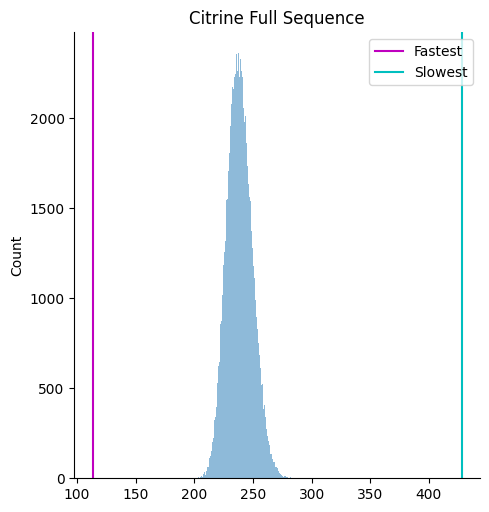

In [5]:
sns.displot(speeds, edgecolor=None, alpha=0.5)#, kind="kde")
plt.axvline(fastscore, c='m', label="Fastest")
plt.axvline(slowscore, c='c', label='Slowest')
plt.legend()
plt.title("Citrine Full Sequence")
plt.show()

In [6]:
# iwasaki_n3p2 = iXnos(min_codon=-3, max_codon=2)
# iwasaki_n3p2.load_state_dict(torch.load("processed-data/iwasaki/models/ixnos_n3p2_full.pth", weights_only=False))
# iwasaki_n3p2.eval()


In [10]:
fast_mutants = iwasaki_n3p2.mutate_seq(fastest, n_mut=5, n_iter=50)
fast_mutant_speeds = [iwasaki_n3p2.predict_elongation(i) for i in fast_mutants]

In [11]:
slow_mutants = iwasaki_n3p2.mutate_seq(slowest, n_mut=5, n_iter=50)
slow_mutant_speeds = [iwasaki_n3p2.predict_elongation(i) for i in slow_mutants]

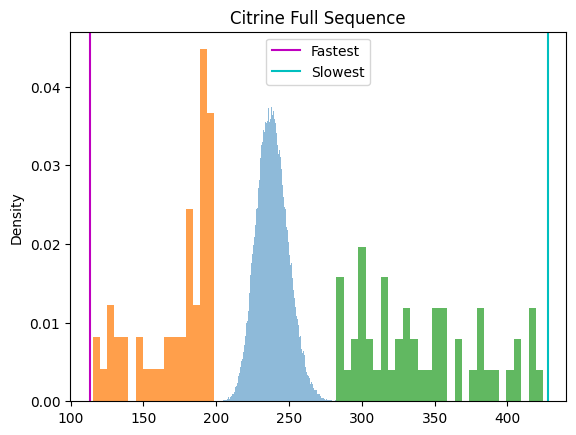

In [12]:
sns.histplot(speeds, edgecolor=None, alpha=0.5, stat='density')#, kind="kde")
sns.histplot(fast_mutant_speeds, edgecolor=None,  stat='density', binwidth=5)#, kind="kde")
sns.histplot(slow_mutant_speeds, edgecolor=None,  stat='density', binwidth=5)#, kind="kde")
plt.axvline(fastscore, c='m', label="Fastest")
plt.axvline(slowscore, c='c', label='Slowest')
plt.legend()
plt.title("Citrine Full Sequence")
plt.show()